In [409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipynb.fs.full.preProcessing as preProcessing

In [442]:
merged = pd.read_csv('final.csv')

cleaned_egm = preProcessing.cleanedEgm
cleaned_offences = preProcessing.cleanedOffences
cleaned_housing_prices = preProcessing.cleanedHousingPrice
cleaned_communities = preProcessing.cleanedCommunities

print(cleaned_egm.shape)
print(cleaned_offences.shape)
print(cleaned_housing_prices.shape)
print(cleaned_communities.shape)

# cleaned_offences[(cleaned_offences['Year'] == 2014) & (cleaned_offences['LGA'] == 'alpine')]

(56, 10)
(560, 6)
(56, 11)
(56, 103)


,Year,Year ending,Police Region,LGA,Offence Count,"Rate per 100,000 population"
798,2014,December,2 Eastern,alpine,467.0,3779.8


# EDA and trend analysis for Offences

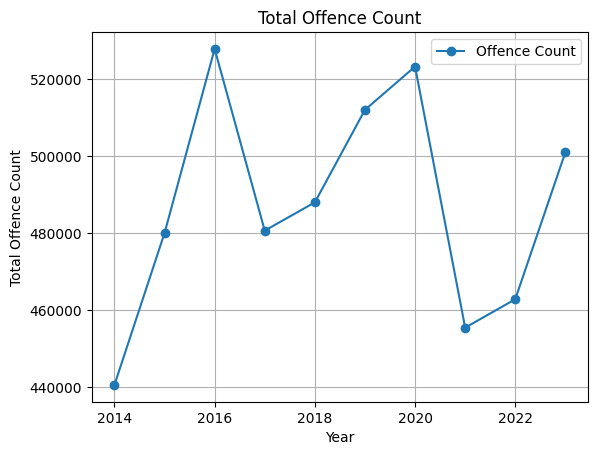

In [411]:
unique_years = cleaned_offences['Year'].unique()

# Get total offence count (across all LGAs) for each year
data = {}
for year in unique_years:
    data[year] = cleaned_offences[cleaned_offences['Year'] == year]['Offence Count'].sum()

df = pd.DataFrame(data.items(), columns=['Year', 'Offence Count'])

df.plot(x='Year', y='Offence Count', kind='line', marker='o')
plt.title('Total Offence Count')
plt.xlabel('Year')
plt.ylabel('Total Offence Count')
plt.grid(True)
plt.show()

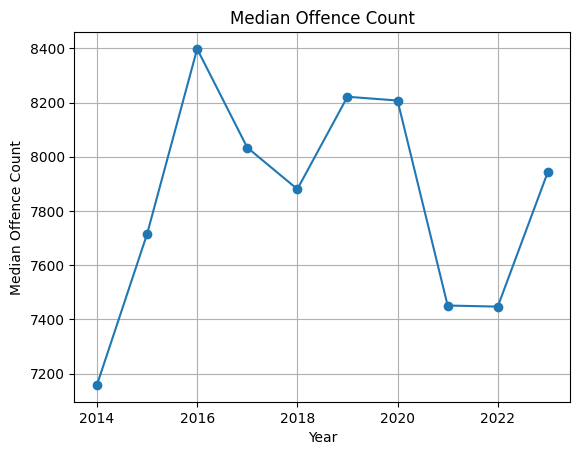

In [412]:
df_median = cleaned_offences.groupby('Year')['Offence Count'].median()

df_median.plot(x='Year', y='Offence Count', kind='line', marker='o')
plt.title('Median Offence Count')
plt.xlabel('Year')
plt.ylabel('Median Offence Count')
plt.grid(True)
plt.show()

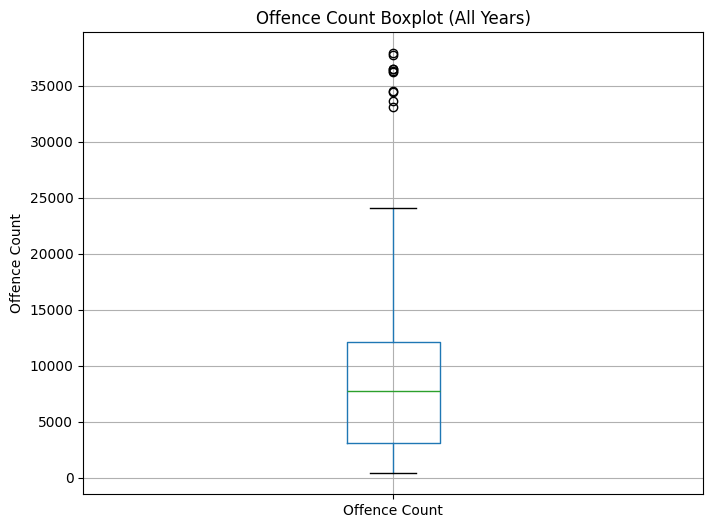

In [413]:
cleaned_offences.boxplot(column='Offence Count', figsize=(8, 6))
plt.title('Offence Count Boxplot (All Years)')
plt.ylabel('Offence Count')
plt.grid(True)
plt.show()

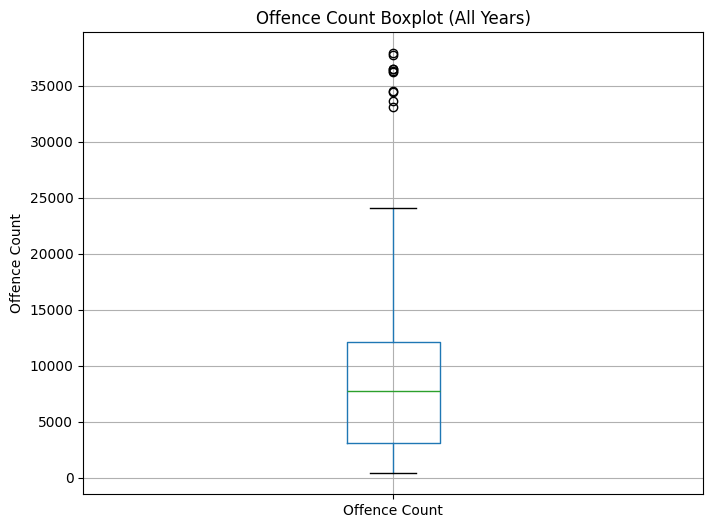

In [414]:
cleaned_offences.boxplot(column='Offence Count', figsize=(8, 6))
plt.title('Offence Count Boxplot (All Years)')
plt.ylabel('Offence Count')
plt.grid(True)
plt.show()

/var/folders/19/534nl8853rg0sycn60dtsltr0000gn/T/ipykernel_39724/2619255097.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=labels)


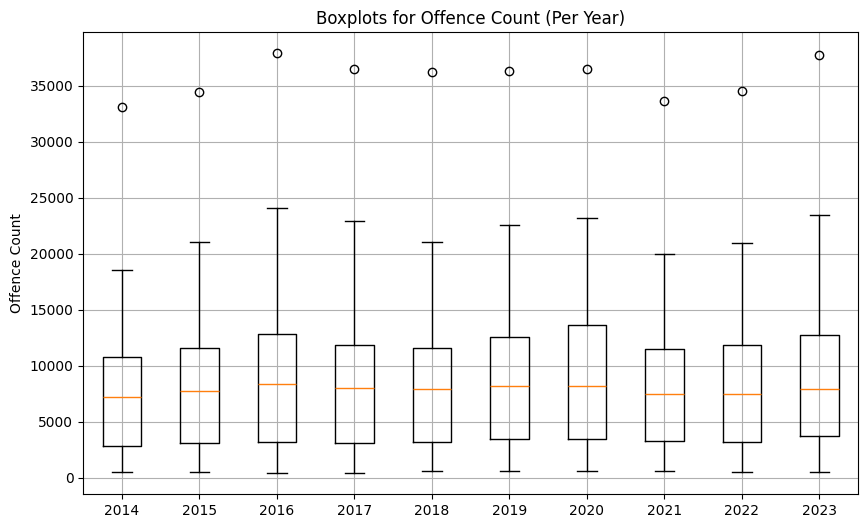

In [415]:
labels = []
data = []

for year, group in cleaned_offences.groupby('Year'):
    labels.append(year)
    data.append(group['Offence Count'])

# Create a figure instance
fig, ax = plt.subplots(figsize=(10, 6))

# Create the boxplot
ax.boxplot(data, labels=labels)

ax.set_title('Boxplots for Offence Count (Per Year)')
ax.set_ylabel('Offence Count')
ax.grid(True)
plt.show()

In [416]:
# Find outliers
# cleaned_offences
outlier_rows_combined = []

for year, group in cleaned_offences.groupby('Year'):
    # print(f'Year: {year}')
    Q1 = group['Offence Count'].quantile(0.25)
    Q3 = group['Offence Count'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = group['Offence Count'][(group['Offence Count'] < lower_bound) | (group['Offence Count'] > upper_bound)]
    # print(outliers)
    # print(cleaned_offences.loc[outliers.index])
    outlier_rows = cleaned_offences.loc[outliers.index]
    # print(outlier_rows[])
    outlier_rows_combined.append(outlier_rows)


outlier_rows = pd.concat(outlier_rows_combined)
print(outlier_rows['LGA'].unique())
print(outlier_rows['Police Region'].unique())

"""
Output:
['melbourne']
['1 North West Metro']

Conclusion: all outliers are from "melbourne" LGA "1 North West Metro"
"""


['melbourne']
['1 North West Metro']


'\nOutput:\n[\'melbourne\']\n[\'1 North West Metro\']\n\nConclusion: all outliers are from "melbourne" LGA "1 North West Metro"\n'

# EDA and trend analysis for EGM

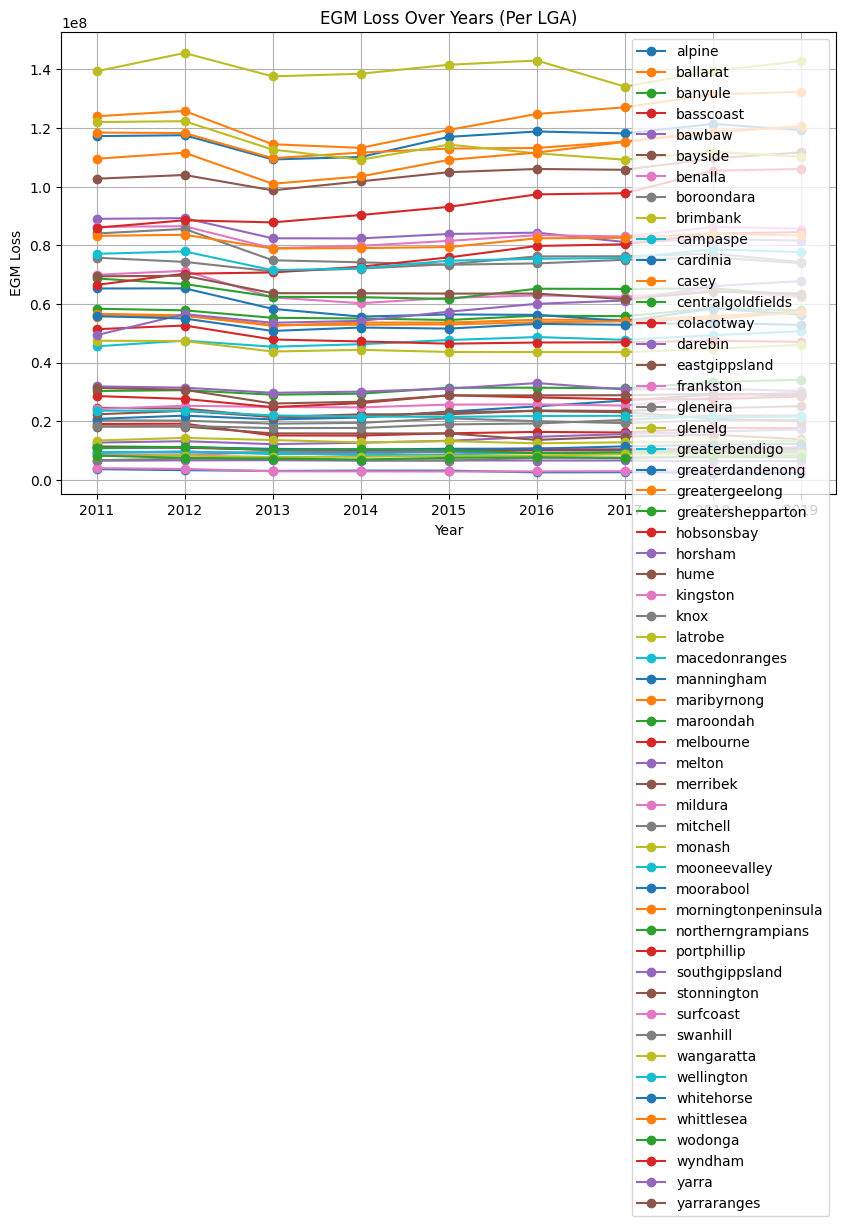

In [417]:
# Plot time series of EGM loss over years per LGA
fig, ax = plt.subplots(figsize=(10, 6))

for lga, group in cleaned_egm.groupby('LGA'):
    data={
        'years': [],
        'values': [],
    }

    for year in range(2011, 2020):
        year = str(year)
        data['years'].append(year)
        data['values'].append(group[year].iloc[0])

    ax.plot(data['years'], data['values'], marker='o', label=lga)

ax.set_title('EGM Loss Over Years (Per LGA)')
ax.set_xlabel('Year')
ax.set_ylabel('EGM Loss')
ax.legend()
ax.grid(True)
plt.show()

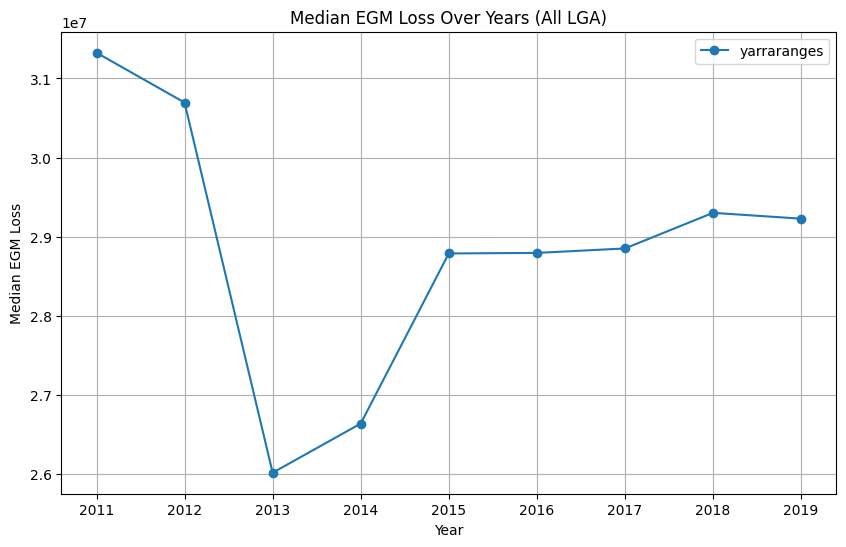

In [418]:
# Plot time series of median EGM loss over years (All LGA)
fig, ax = plt.subplots(figsize=(10, 6))

data={
    'years': [],
    'values': [],
}

for year in range(2011, 2020):
    year = str(year)
    data['years'].append(year)
    data['values'].append(group[year].median())

ax.plot(data['years'], data['values'], marker='o', label=lga)

ax.set_title('Median EGM Loss Over Years (All LGA)')
ax.set_xlabel('Year')
ax.set_ylabel('Median EGM Loss')
ax.legend()
ax.grid(True)
plt.show()

/var/folders/19/534nl8853rg0sycn60dtsltr0000gn/T/ipykernel_39724/2375451917.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=labels)


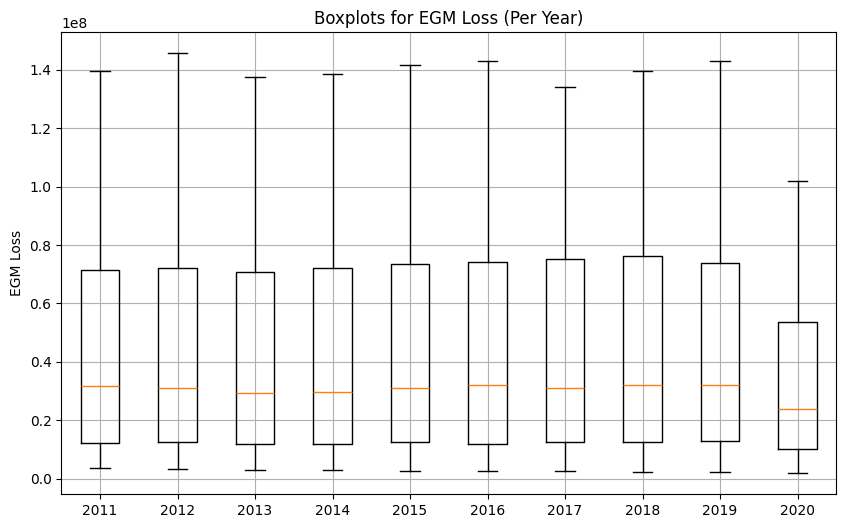

In [419]:
cleaned_egm_melted = pd.melt(cleaned_egm.reset_index(), id_vars=['LGA'], var_name='Year', value_name='loss')

labels = []
data = []

for year, group in cleaned_egm_melted.groupby('Year'):
    labels.append(year)
    data.append(group['loss'])

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(data, labels=labels)
ax.set_title('Boxplots for EGM Loss (Per Year)')
ax.set_ylabel('EGM Loss')
ax.grid(True)
plt.show()


In [420]:
# # Find outliers
# outlier_rows_combined = []

# for year, group in cleaned_egm_melted.groupby('Year'):
#     # print(f'Year: {year}')
#     Q1 = group['loss'].quantile(0.25)
#     Q3 = group['loss'].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers = group['loss'][(group['loss'] < lower_bound) | (group['loss'] > upper_bound)]
#     outlier_rows = cleaned_egm_melted.loc[outliers.index]
#     outlier_rows_combined.append(outlier_rows)


# outlier_rows = pd.concat(outlier_rows_combined)
# print(outlier_rows['LGA'].unique())
# print(outlier_rows['loss'].unique())

# There are no outliers in EGM loss data


In [439]:
# Calculate population data from offence count and rate per 100,000 population

population = cleaned_communities['Population']

population_data = {
    'year': [],
    'population': [],
    'lga': [],
}

for (lga, year), group in cleaned_offences.groupby(['LGA', 'Year']):
    # Calculate population
    population_count = group['Offence Count'].sum() / group['Rate per 100,000 population'].sum() * 100000
    # print(group)

    # Save row
    population_data['year'].append(year)
    population_data['lga'].append(lga)
    population_data['population'].append(population_count)

population_data = pd.DataFrame(population_data)
population_data.head()

,year,population,lga
0,2014,12355.151066,alpine
1,2015,12429.148769,alpine
2,2016,12578.003120,alpine
3,2017,12686.879978,alpine
4,2018,12821.932369,alpine


mean_squared_error:  115402985.49727151
root_mean_squared_error:  10742.5781587695


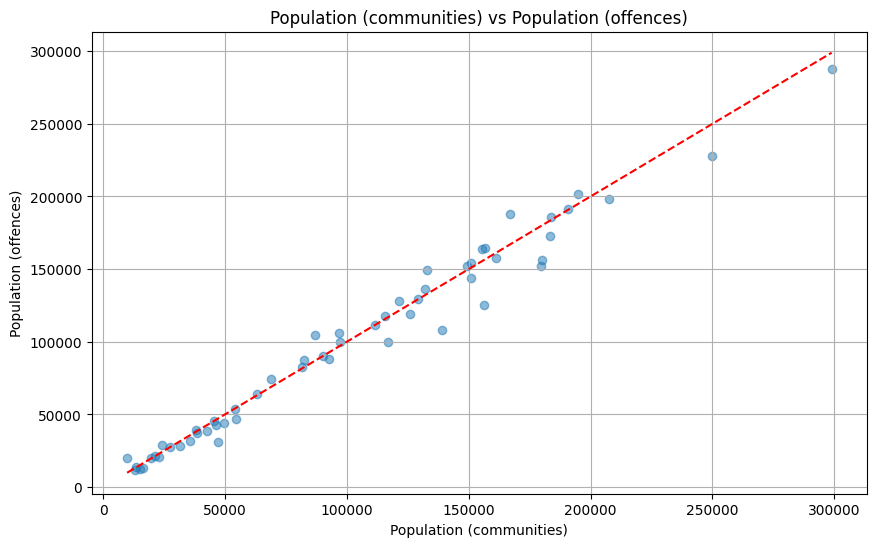

In [422]:
# Compare population from communities to population from offences dataset

# Smallest year value is 2014
population_data['year'].unique()

cleaned_communities_copy = cleaned_communities.reset_index()
cleaned_communities_copy.rename(columns={'LGA': 'lga'}, inplace=True)
cleaned_communities_copy.rename(columns={'Population': 'population'}, inplace=True)

population_data_copy = population_data.copy()
population_data_copy.rename(columns={'population': 'estimate'}, inplace=True)

population_comparison = pd.merge(
  population_data_copy[population_data_copy['year'] == 2014], 
  cleaned_communities_copy[['lga', 'population']], 
  on='lga',
  how='inner'
)


# population_comparison
mean_squared_error = np.mean((population_comparison['population'] - population_comparison['estimate']) ** 2)
print('mean_squared_error: ', mean_squared_error)

root_mean_squared_error = np.sqrt(mean_squared_error)
print('root_mean_squared_error: ', root_mean_squared_error)

# Plot population vs estimate
plt.figure(figsize=(10, 6))
plt.scatter(population_comparison['population'], population_comparison['estimate'], alpha=0.5)
plt.plot(
    [population_comparison['population'].min(), population_comparison['population'].max()],
    [population_comparison['population'].min(), population_comparison['population'].max()],
    color='red', 
    linestyle='--'
)
plt.title('Population (communities) vs Population (offences)')
plt.xlabel('Population (communities)')
plt.ylabel('Population (offences)')
plt.grid(True)
plt.show()


In [432]:
from sklearn.metrics import mean_squared_error
import math

rmse = math.sqrt(mean_squared_error(population_comparison['population'], population_comparison['estimate']))
rmse_percentage = round(rmse / population_comparison['population'].mean() * 100, 2)

print('Root Mean Squared Error:', round(rmse))
print('Root Mean Squared Error %:', f'{rmse_percentage}%')

mae = np.mean(np.abs(population_comparison['population'] - population_comparison['estimate']))
print('Mean Absolute Error:', round(mae))
print('Mean Absolute Error %:', f'{round(mae / population_comparison["population"].mean() * 100, 2)}%')

Root Mean Squared Error: 10743
Root Mean Squared Error %: 10.61%
Mean Absolute Error: 7149
Mean Absolute Error %: 7.06%


# Conclusion

* The population given in the communities dataset can approximated by using offence count and offence rate per population of 100,000.

    * From communities: `population = Population Density * Area (km^2)`
    * From offences: `population = Offence Count / Rate per 100,000 population * 100,000`

* Even though the the population figures from communities dataset is from 2012 and the earliest data from offences dataset is 2014, the relationship is still strong. 

* This means we can use offence data to derive the population size for years 2014 to 2023.

count     56.000000
mean      87.531777
std       90.433686
min        4.897709
25%       20.246923
50%       52.602954
75%      131.271874
max      384.960766
Name: Travel time to GPO (minutes), dtype: float64

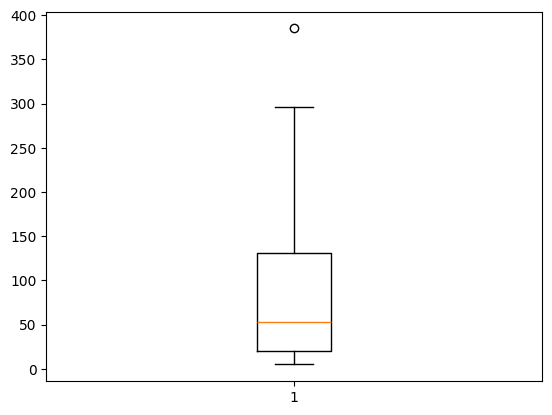

In [424]:
plt.boxplot(cleaned_communities['Travel time to GPO (minutes)'])
cleaned_communities['Travel time to GPO (minutes)'].describe()

In [425]:
# Find the columns (from communities) with high correlation with population
merged = pd.merge(cleaned_communities, population_data, left_on='LGA', right_on='lga', how='inner')
for name in cleaned_communities.columns:
    correlation = merged[[name, 'population']].corr().iloc[0, 1]
    if correlation > 0.8 or correlation < -0.8:
        print(name, correlation)

2012 ERP, total 0.9685067397194017
2007 ERP, total 0.8628880033722958
Number of Households 0.9471171914658656
Number of families 0.9538666381362692
Number of Dwellings 0.9096058498369743
Population 0.9685067397194017


Output (extract):
```
Number of Households 0.9471171914658656
Number of families 0.9538666381362692
Number of Dwellings 0.9096058498369743
```

These three columns seems have the highest correlation with population, so will try these in model training


['casey']


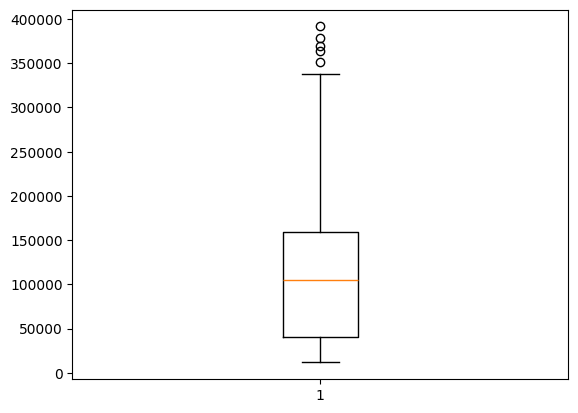

In [426]:
plt.boxplot(population_data['population'])
population_data['population'].describe()

# Find outliers
# cleaned_offences
outlier_rows_combined = []

for year, group in population_data.groupby('year'):
    # print(f'Year: {year}')
    Q1 = group['population'].quantile(0.25)
    Q3 = group['population'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = group['population'][(group['population'] < lower_bound) | (group['population'] > upper_bound)]
    # print(outliers)
    # print(cleaned_offences.loc[outliers.index])
    outlier_rows = population_data.loc[outliers.index]
    # print(outlier_rows[])
    outlier_rows_combined.append(outlier_rows)


outlier_rows = pd.concat(outlier_rows_combined)
print(outlier_rows['lga'].unique())

# population_data = population_data.loc[population_data['lga'] != 'casey']

In [427]:
# Check Pearson Correlation between housing prices and population

housing_prices_melted = pd.melt(cleaned_housing_prices.reset_index(), id_vars=['LGA'], var_name='Year', value_name='Price')
housing_prices_melted['Year'] = housing_prices_melted['Year'].astype(int)

merged = pd.merge(housing_prices_melted, population_data, left_on=['LGA', 'Year'], right_on=['lga', 'year'], how='inner')
merged[['Price', 'population']].corr()

# Output: 0.332611
# There is a weak positive correlation between housing prices and population

,Price,population
Price,1.000000,0.332611
population,0.332611,1.000000


In [448]:
# Check Pearson Correlation between EGM loss and population

cleaned_egm_melted['Year'] = cleaned_egm_melted['Year'].astype(int)

merged = pd.merge(cleaned_egm_melted, population_data, left_on=['LGA', 'Year'], right_on=['lga', 'year'], how='inner')

merged['loss'] = merged['loss'] / merged['population']
merged[['loss', 'population']].corr()

# Output: 0.868776
# There is a strong positive correlation

,loss,population
loss,1.000000,0.023516
population,0.023516,1.000000
